# Heart disease classification

In this notebook we will be exploring how to create a classificatory algorithm and how to tune our models to it in an efficient way. We will be using the Heart Attack Prediction dataset available on [Kaggle](https://www.kaggle.com/imnikhilanand/heart-attack-prediction).

**About this data set**
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The target field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

**Attribute Information**
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. Beta-thalassemia presence: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

In [126]:
import sys 
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}". format(np.__version__))

import scipy as sp
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

import random
import time

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Visualization defaults
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

from sklearn.feature_selection import RFE
from sklearn.svm import SVR, SVC, NuSVC 
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import PowerTransformer 
from numpy import loadtxt
from xgboost import XGBClassifier, plot_importance
from matplotlib import pyplot
import sklearn
import lightgbm 
from sklearn import svm
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis, model_selection
from sklearn.metrics import roc_curve, auc
from numpy import interp
from matplotlib import rcParams
from plotnine import *

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

Python version: 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
pandas version: 1.0.3
matplotlib version: 3.2.1
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 7.13.0
scikit-learn version: 0.23.1
-------------------------
health-care-data-set-on-heart-attack-possibility



In [127]:
heart = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')

# EDA

We will start with an exploratory analysis of the dataset.

In [128]:
heart.sample(n = 10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1


In [129]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


It seems like we have a few numerical features and the rest are categorical features.
First up, we need to check if there's any missing value on our dataset

In [130]:
print('Train columns with null values:\n', heart.isnull().sum())
print("-" * 10)

Train columns with null values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
----------


We don't need to do any preprocessing for missing values. We can go on with the EDA, this time taking a look at how the target variable is related to the rest of explanatory features.

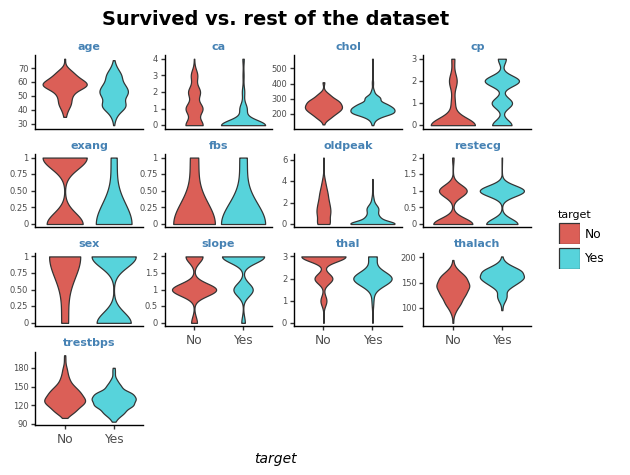

<ggplot: (8734924416477)>

In [131]:
rcParams['figure.figsize'] = 18, 10
train_plot = pd.melt(heart, id_vars = ['target'], value_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
train_plot['target'] = train_plot['target'].astype('category')
train_plot['target'].replace(0, 'No', inplace = True)
train_plot['target'].replace(1, 'Yes', inplace = True)

ggplot(train_plot, aes(x = 'target', y = 'value', fill = 'target')) + \
    geom_violin() + \
    theme_classic() + \
    theme(axis_title_y = element_blank(),
          axis_title_x = element_text(size = 10, face = 'italic'),
          subplots_adjust = {'wspace':0.2},
          strip_background = element_blank(),
          strip_text = element_text(size = 8, colour = 'steelblue', face = 'bold'),
          axis_text_y = element_text(size = 6),
          legend_title = element_text(size = 8),
          plot_title = element_text(size = 14, face = 'bold')) + \
    labs(title = 'Survived vs. rest of the dataset') + \
    facet_wrap('~variable', scales = 'free_y')

Some features such as sex, age, chest pain or ST depression looks related to the risk of having a heart condition. It looks feasible to create a classificatory model to predict heart attack risk. First thing then would be to check whether there's a good balance in our dataset between people with heart condition or not. Otherwise we are gonna need to do some resampling technique.

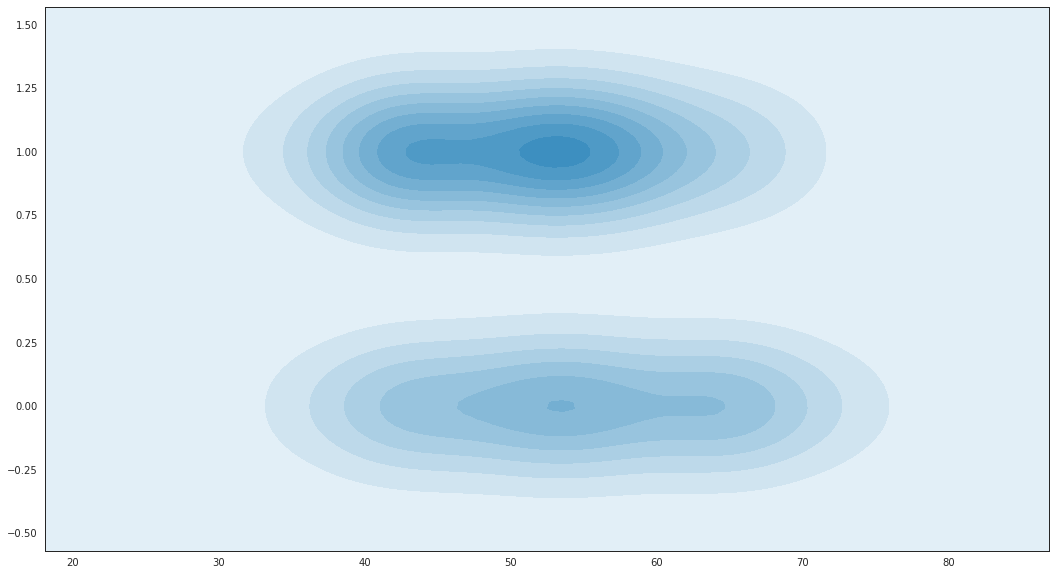

In [132]:
sns.kdeplot(heart[heart.target == 0], shade = True)
sns.kdeplot(heart[heart.target == 1], shade = True)

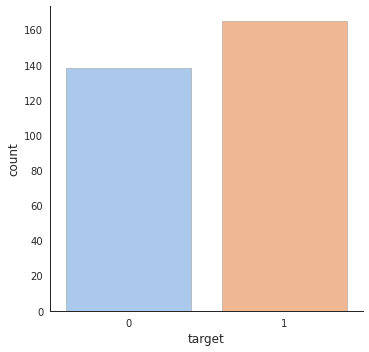

In [133]:
sns.catplot(x = 'target', data = heart, kind = 'count',
           palette="pastel", edgecolor=".6")

It's a balanced dataset. No need of resampling or balancing the target categories, so we can proceed with the dataset as it is.

The next step is to check whether there're outlier values. We're going to draw a boxplot with the only 4 numerical features on the model.

Text(0.5, 1.0, 'Numerical features boxplots')

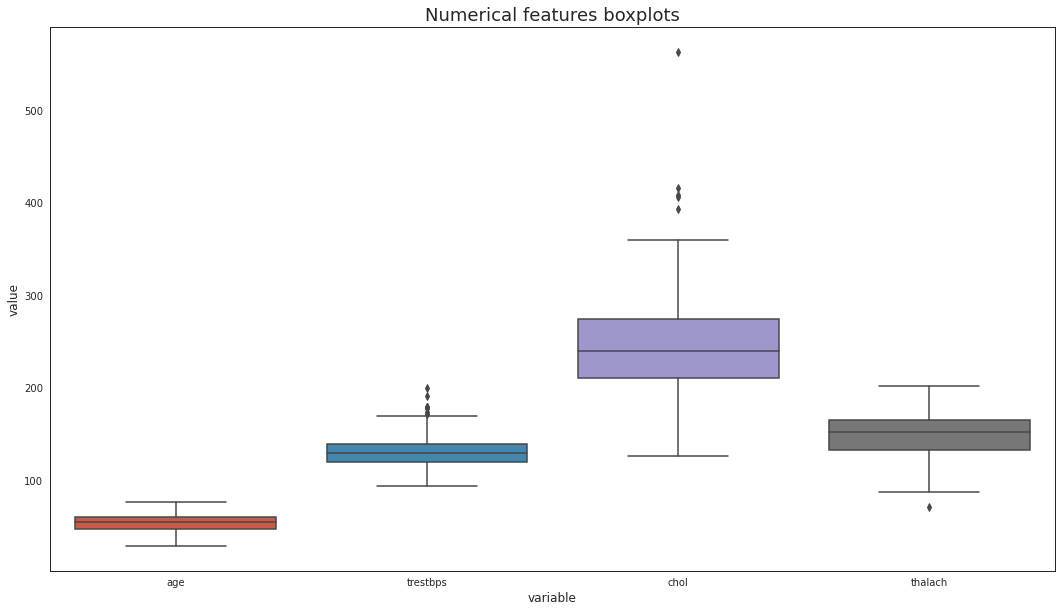

In [134]:
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(heart[['age', 'trestbps', 'chol', 'thalach']])).set_title('Numerical features boxplots', size = 18)

There're a few outliers in the cholesterol variable, but they seem to be accurate and not due to any input error, so it's better not to remove them from the analysis in order to make it more conservative.

Lastly, we need to check the correlation between variables. Since this is a classificatory model, multicolinearility shouldn't be an issue, we just need to analyze if we can explain variance on the target variable with the available explanatory features.

Text(0.5, 1.0, 'Correlation Heatmap Matrix')

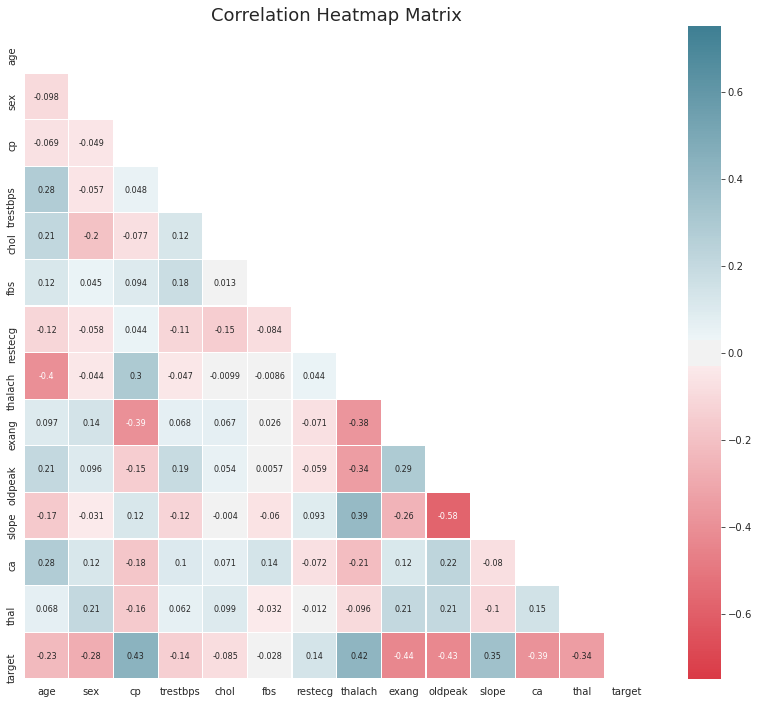

In [135]:
mask_ut = np.triu(np.ones(heart.corr().shape)).astype(np.bool)

def correlation_heatmap(df, center = None):
    fig, ax = plt.subplots(figsize = [14, 12])
    colormap = sns.diverging_palette(10, 220, as_cmap = True)
    fig = sns.heatmap(df.corr(),
                     cmap = colormap,
                     center = center,
                     annot = True,
                     mask = mask_ut,
                     linewidths = 0.1,
                     vmin = -0.75, vmax = 0.75, #show just significants
                     annot_kws = {'fontsize':8})
    
correlation_heatmap(heart, center = 0)
plt.title('Correlation Heatmap Matrix', size = 18)

As we suspected in the first place, some variables as thal, slope of peak exercise, sex and colesterol are strongly correlated to the risk of having a heart condition. It looks feasible to create a predictive model with this dataset.

# Feature Engineering

We reached the following step in our work. There are a few things we need to do with the dataset before creating the ML ensemble, such as dummify the categorical variables or standardize the numerical features.

In [136]:
heart.sample(n = 10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


They are categorical so we need to create dummy features for each one of them if we want to avoid creating a cardinality issue when creating the classificatory algorithms.

These are the candidates to be converted into dummy features:
1. sex
2. cp (Chest pain)
3. fbs (fasting blood sugar) 
4. restecg (resting electrocardiagraphic results) 
5. exang (exercise induced angina)
6. slope (slope of the peak exercise) 
7. ca (colored vessels)
8. thal 

In [137]:
heart.iloc[:,[1, 2, 5, 6, 8, 10, 11, 12]]

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


In [138]:
#to_dummies = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

to_dummies = [1, 2, 5, 6, 8, 10, 11, 12]    
def dummify(model, to_dummies):
    col_names = model.columns[to_dummies]
    if np.isnan(model.values).any() == True:
        print('Check out for missing values!')
        
    model = pd.get_dummies(model, columns = col_names)
    return model

heart = dummify(heart, to_dummies)
heart.sample(n = 5)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
13,64,110,211,144,1.8,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
280,42,136,315,125,1.8,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
115,37,120,215,170,0.0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
99,53,130,246,173,0.0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
74,43,122,213,165,0.2,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


The categorical variables are now dummified. Next up, we will be creating the train/test split and then applying a transformation on the data so all the features will have the same weight on the model. It is crucial to do the split **before the transformation** and not afterwards if we want to be conservative.

In [139]:
X_train, X_test, y_train, y_test = train_test_split(heart.iloc[:,~heart.columns.isin(['target'])],
                                   heart['target'],
                                   test_size = 0.2, random_state = 25)

print('The train subset has {0} rows. \nThe test subset has {1} rows.'.format(X_train.shape[0], X_test.shape[0]) )

The train subset has 242 rows. 
The test subset has 61 rows.


Now we will apply a Yeo-Johnson transformation on the train split, save the parameters and apply the same transformation to the test split. 

In [140]:
target_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
pwr = PowerTransformer(method = 'yeo-johnson', standardize = True)
X_train_val = X_train[target_col]
train_cols = X_train[target_col].columns
train_idx = X_train[target_col].index

X_train_val = pwr.fit_transform(X_train_val)
X_train_val

array([[-1.80600508,  0.03841434,  0.17301301,  1.80855068,  1.60311756],
       [-1.31371511, -0.59734807, -0.69705044,  1.01126202, -1.15827623],
       [-0.80359084, -1.1746995 , -0.81636435, -0.42427456, -0.91743106],
       ...,
       [-1.00969095,  0.69949832,  1.17400383, -0.25376993, -1.15827623],
       [ 1.39185539, -1.65587645, -0.37956899, -0.46591947, -0.52122506],
       [-1.31371511, -0.59734807,  0.95753206,  0.44243055, -1.15827623]])

In [141]:
X_train_val2 = X_train.iloc[:,~X_train.columns.isin(target_col)]
X_train_val = pd.DataFrame(X_train_val, columns = train_cols).set_index(train_idx)
X_train = pd.merge(X_train_val, X_train_val2, left_index = True, right_index = True)
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
1,-1.806005,0.038414,0.173013,1.808551,1.603118,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
142,-1.313715,-0.597348,-0.697050,1.011262,-1.158276,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
126,-0.803591,-1.174699,-0.816364,-0.424275,-0.917431,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
37,-0.061919,1.089709,-0.187258,0.592613,0.819292,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
275,-0.276948,-0.268650,-0.627015,0.746497,0.364029,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,1.391855,-2.185671,1.020560,-1.114909,0.268056,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
151,1.857385,-1.174699,-2.401759,-1.114909,0.819292,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
255,-1.009691,0.699498,1.174004,-0.253770,-1.158276,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
143,1.391855,-1.655876,-0.379569,-0.465919,-0.521225,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [142]:
X_test_val = X_test[target_col]
test_cols = X_test[target_col].columns
test_idx = X_test[target_col].index

X_test_val = pwr.transform(X_test_val)
X_test_val

array([[-0.27694842, -0.08196119, -0.81636435,  0.15308039,  0.3640294 ],
       [-1.00969095, -0.08196119,  1.15891659,  0.85115524, -1.15827623],
       [-0.38354285,  0.59603688,  1.15891659, -0.46591947,  0.75486044],
       [-1.51285365, -1.33013145, -1.81817747, -1.47697582,  1.04425864],
       [-2.09216562, -0.73543544, -1.38415569,  1.0654662 , -1.15827623],
       [ 1.50747327, -0.59734807, -0.65023378, -1.44589284,  0.75486044],
       [ 1.16217962,  0.4900278 ,  0.74574192,  1.0654662 ,  0.68648433],
       [-1.21307128,  0.15567897,  0.11506472, -0.42427456, -0.91743106],
       [ 1.27675572,  0.89915577,  0.67832325, -0.03173788, -1.15827623],
       [-1.31371511,  0.03841434, -1.43962101, -0.12174401, -1.15827623],
       [ 0.70922303,  0.8501214 ,  1.14377326, -0.29698672,  0.3640294 ],
       [ 0.2651106 ,  0.15567897, -0.74438112,  0.74649711, -1.15827623],
       [ 1.16217962,  0.32601541,  0.24905398, -1.04426053,  1.38334493],
       [ 0.2651106 ,  1.08970859,  0.6

In [143]:
X_test_val2 = X_test.iloc[:,~X_test.columns.isin(target_col)]
X_test_val = pd.DataFrame(X_test_val, columns = test_cols).set_index(test_idx)
X_test = pd.merge(X_test_val, X_test_val2, left_index = True, right_index = True)
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
281,-0.276948,-0.081961,-0.816364,0.153080,0.364029,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
81,-1.009691,-0.081961,1.158917,0.851155,-1.158276,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
40,-0.383543,0.596037,1.158917,-0.465919,0.754860,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
175,-1.512854,-1.330131,-1.818177,-1.476976,1.044259,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
58,-2.092166,-0.735435,-1.384156,1.065466,-1.158276,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-0.906976,0.596037,1.204012,-1.285008,0.937743,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
294,-1.111726,-0.597348,-1.757793,-0.382238,1.383345,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
133,-1.413646,-1.330131,-0.125040,0.013865,-1.158276,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
196,-0.906976,1.089709,-0.208202,-0.253770,1.630386,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


This is how our dataset looks now. The numerical features are standardize so the mean = 0 and the standard deviation is close to 1, and the rest of features are dummies that are not gonna mess with our classificatory ML algorithms. Let's take a fast look at the importance of the whole set of features. 

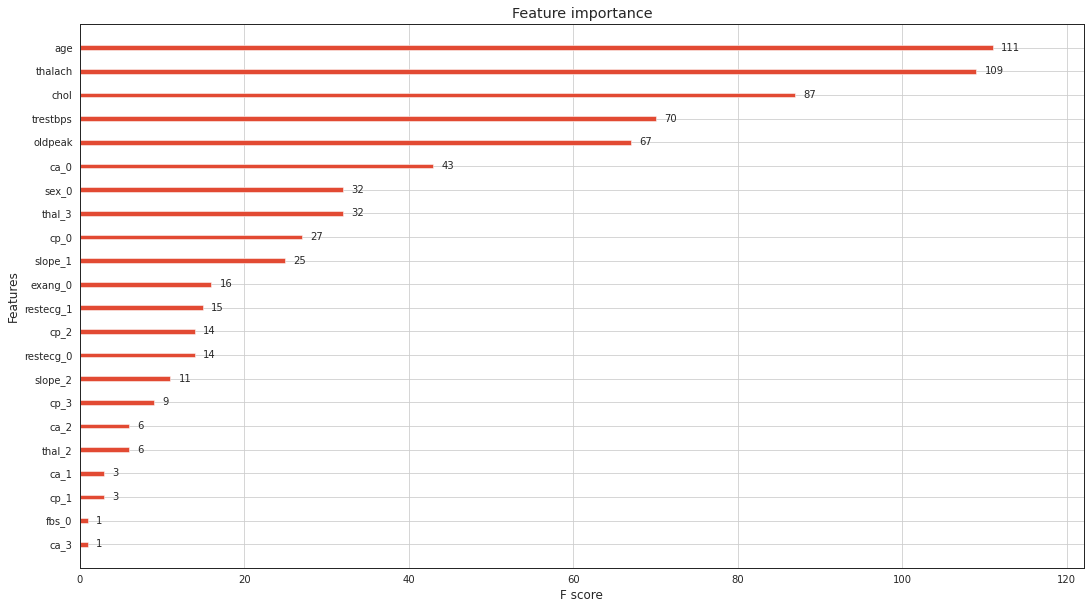

In [144]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

plot_importance(classifier)
pyplot.show()

Age, thalassemia presence and cholesterol level are the most influential variables. Note that this are numerical variables, so they are gonna be decisively more important in this case.

# Model selection

AdaB: 0.794548 (0.110873)
Bagg: 0.793665 (0.089487)
ExtTreeS: 0.855429 (0.055692)
GradB: 0.778332 (0.104906)
RF: 0.856640 (0.069297)
GaussProc: 0.826371 (0.059793)
LR: 0.825212 (0.079796)
PassAg: 0.804095 (0.079501)
Ridge: 0.862123 (0.062011)
SGDC: 0.778317 (0.079050)
Perc: 0.793156 (0.091553)
BernNB: 0.843008 (0.081664)
GaussNB: 0.730958 (0.086218)
KNN: 0.824939 (0.045807)
SVM: 0.841543 (0.053185)
NuSVM: 0.832204 (0.053339)
LinearSVC: 0.845974 (0.069923)
CART: 0.747899 (0.086551)
ExtTree: 0.795391 (0.060780)
LDA: 0.855449 (0.060702)
QuadDA: 0.428518 (0.170297)
XGB: 0.789413 (0.086506)
LightGBM: 0.794323 (0.086080)


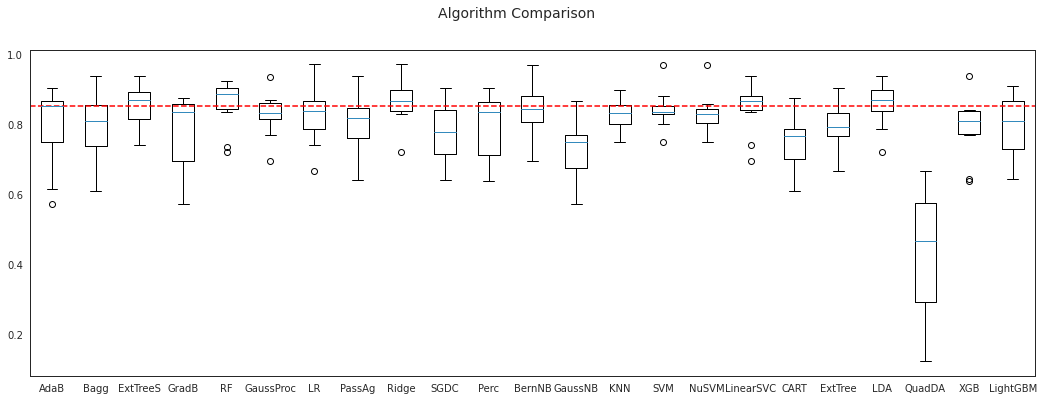

In [145]:
MLA = []
kfold = 8
scoring = 'f1' #accuracy
hline_thres = 0.85

    #Ensemble Methods
MLA.append(('AdaB', ensemble.AdaBoostClassifier()))  
MLA.append(('Bagg', ensemble.BaggingClassifier()))   
MLA.append(('ExtTreeS', ensemble.ExtraTreesClassifier()))    
MLA.append(('GradB', ensemble.GradientBoostingClassifier()))  
MLA.append(('RF', ensemble.RandomForestClassifier()))
    # Gaussian Process
MLA.append(('GaussProc', gaussian_process.GaussianProcessClassifier()))
    #GLM
MLA.append(('LR', linear_model.LogisticRegressionCV()))
MLA.append(('PassAg', linear_model.PassiveAggressiveClassifier()))
MLA.append(('Ridge', linear_model.RidgeClassifierCV()))
MLA.append(('SGDC', linear_model.SGDClassifier()))
MLA.append(('Perc', linear_model.Perceptron()))

    # Naive Bayes
MLA.append(('BernNB', naive_bayes.BernoulliNB()))
MLA.append(('GaussNB', naive_bayes.GaussianNB()))
    # KNN
MLA.append(('KNN', neighbors.KNeighborsClassifier()))
    #SVM
MLA.append(('SVM', svm.SVC(probability = True)))
MLA.append(('NuSVM', svm.NuSVC(probability = True)))
MLA.append(('LinearSVC', svm.LinearSVC()))
    # Trees
MLA.append(('CART', tree.DecisionTreeClassifier()))
MLA.append(('ExtTree', tree.ExtraTreeClassifier()))
    #Discriminant Analysis
MLA.append(('LDA', discriminant_analysis.LinearDiscriminantAnalysis()))
MLA.append(('QuadDA', discriminant_analysis.QuadraticDiscriminantAnalysis()))
    # Boost
MLA.append(('XGB', XGBClassifier()))
    # Bagging
MLA.append(('LightGBM', lightgbm.LGBMClassifier()))
    
results = []
names = []

for name, model in MLA:
    kfold = model_selection.KFold(n_splits = 10, random_state = 1)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure(figsize = (18, 6))
fig.suptitle('Algorithm Comparison', size = 14)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.axhline(y = hline_thres, color = 'r', linestyle = 'dashed')
plt.show()

According to our research, the best candidates are:
1. ExtraTrees
2. Random Forest
3. Logistic Regression
4. Ridge
5. SVM
6. NuSVM
7. LinearSVC
8. LDA

Additionaly, we may want to try again with a tuned XGBoost and LightGBM. The mix of a boosting and a bagging model can add an extra efficiency to our ensemble model.

# Tunning parameters

In light of the example, we are going to explain step by step how to tune a Random Forest model from a brute force approach. First things first, we will try using the model as it is, without tuning any parameters and we will calculate its normalized Gini score. 

$gini = 2 x AUC - 1$

This metric is a reformulation of the AUC where a random prediction = 0 instead of 0.5 as in AUC, so it's easier to read. 

In [94]:
xgb = XGBClassifier(random_state = 1)

grid_search = GridSearchCV(
    estimator = xgb,
    param_grid = {},
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  # To convert to normalized gini, multiply the obtained AUC values by 2 and subtract 1.
print('\n Best hyperparameters:')
print(grid_search.best_params_)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best normalized gini score for 5-fold search:
0.7364253393665159

 Best hyperparameters:
{}


[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    2.4s finished


Normalized Gini score for a raw model is 0.736, which is not bad but still far from perfect. Let's proceed with a grid search with CV.
In the first step we will be selecting the best number of estimators and depth of the forest.

In [95]:
xgb = XGBClassifier(random_state = 1)

params = {'max_depth': range(3, 10, 1),
          'min_child_weight': range(1, 6, 1)
         }

grid_search = GridSearchCV(
    estimator = xgb,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 35 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.4s



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best normalized gini score for 5-fold search:
0.7678672430510667

 Best hyperparameters:
{'max_depth': 3, 'min_child_weight': 5}


[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    5.1s finished


Gini score improved from 0.73 to 0.76. Perhaps we can improve this score even further. Let's turn our attention to the Gamma parameter.

In [96]:
xgb = XGBClassifier(random_state = 1)

params = {'max_depth': [3],
          'min_child_weight': [5],
          'gamma': [i/10.0 for i in range(0,8)]
         }

grid_search = GridSearchCV(
    estimator = xgb,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 8 candidates, totalling 64 fits

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best normalized gini score for 5-fold search:
0.7689328135100193

 Best hyperparameters:
{'gamma': 0.2, 'max_depth': 3, 'min_child_weight': 5}


[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    1.1s finished


It doesn't improve that much. The problem we see here is that there might be too many features with too low variance. We can try subsampling the dataset to reduce the noise of those features.

In [97]:
xgb = XGBClassifier(random_state = 1)

params = {'max_depth': [3],
          'min_child_weight': [5],
          'gamma' : [0.1],
          'colsample_bytree': np.arange(0.6, 1, 0.1),
          'subsample': np.arange(0.6, 1, 0.1)
         }

grid_search = GridSearchCV(
    estimator = xgb,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 16 candidates, totalling 128 fits

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best normalized gini score for 5-fold search:
0.8227617970265029

 Best hyperparameters:
{'colsample_bytree': 0.6, 'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.7}


[Parallel(n_jobs=4)]: Done 128 out of 128 | elapsed:    2.1s finished


It worked. Subsampling helps us not only improve accuracy but also shorten the model running time. Now we just need to try with some regularization.

In [98]:
xgb = XGBClassifier(random_state = 1)

params = {'max_depth': [3],
          'min_child_weight': [5],
          'gamma' : [0.1],
          'colsample_bytree': [0.6],
          'subsample': [0.7],
          'reg_alpha': np.arange(0, 1, 0.05),
          'reg_lambda': np.arange(0, 2, 0.05)
         }

grid_search = GridSearchCV(
    estimator = xgb,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 800 candidates, totalling 6400 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 1728 tasks      | elapsed:   22.6s
[Parallel(n_jobs=4)]: Done 3128 tasks      | elapsed:   40.4s
[Parallel(n_jobs=4)]: Done 4928 tasks      | elapsed:  1.1min



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0.4, reg_lambda=1.85, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best normalized gini score for 5-fold search:
0.8303015917905623

 Best hyperparameters:
{'colsample_bytree': 0.6, 'gamma': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'reg_alpha': 0.4, 'reg_lambda': 1.85, 'subsample': 0.7}


[Parallel(n_jobs=4)]: Done 6400 out of 6400 | elapsed:  1.4min finished


That made our model more conservative and prevent any potential risk of overfit.
These were our last parameters to tune, now the last thing would be to look for a different learning_rate increasing the number of estimators 

Best: -0.381144 using {'learning_rate': 0.1, 'n_estimators': 65}
-0.693147 (0.000000) with: {'learning_rate': 0.025, 'n_estimators': 0}
-0.655249 (0.007115) with: {'learning_rate': 0.025, 'n_estimators': 5}
-0.625150 (0.013257) with: {'learning_rate': 0.025, 'n_estimators': 10}
-0.598379 (0.015781) with: {'learning_rate': 0.025, 'n_estimators': 15}
-0.576588 (0.018560) with: {'learning_rate': 0.025, 'n_estimators': 20}
-0.556932 (0.021812) with: {'learning_rate': 0.025, 'n_estimators': 25}
-0.537103 (0.023681) with: {'learning_rate': 0.025, 'n_estimators': 30}
-0.521377 (0.027266) with: {'learning_rate': 0.025, 'n_estimators': 35}
-0.507063 (0.029487) with: {'learning_rate': 0.025, 'n_estimators': 40}
-0.492750 (0.032522) with: {'learning_rate': 0.025, 'n_estimators': 45}
-0.482167 (0.034961) with: {'learning_rate': 0.025, 'n_estimators': 50}
-0.472968 (0.036392) with: {'learning_rate': 0.025, 'n_estimators': 55}
-0.464884 (0.038698) with: {'learning_rate': 0.025, 'n_estimators': 60}
-

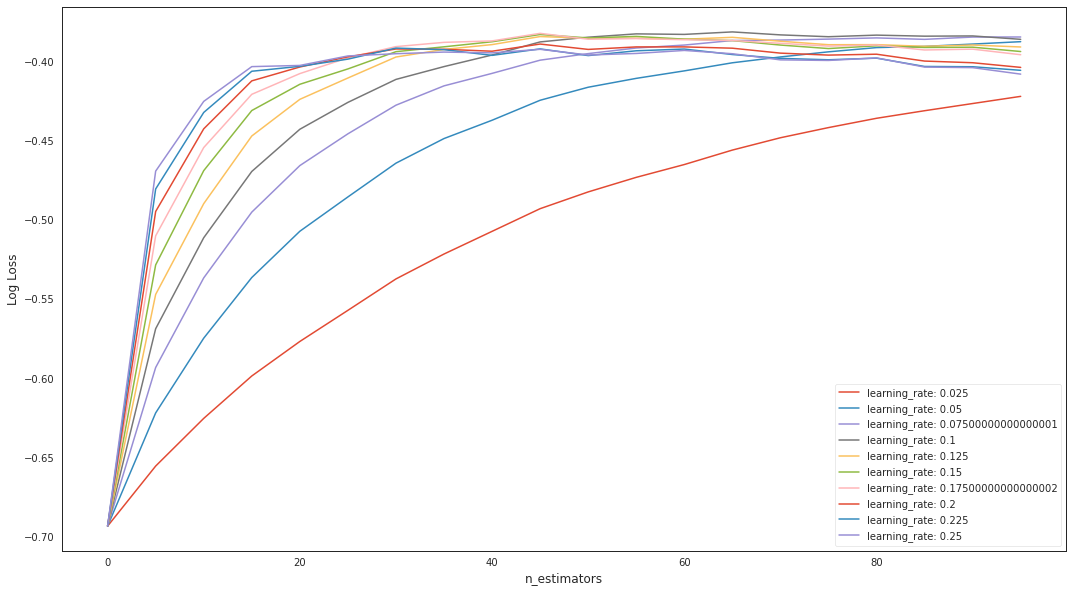

In [99]:
xgb = XGBClassifier(max_depth = 3,
                    min_child_weight = 5,
                    gamma = 0.1,
                    colsample_bytree = 0.6,
                    subsample = 0.7,
                    reg_alpha = 0.95,
                    reg_lambda = 1)

n_estimators = np.arange(0, 100, 5)
learning_rate = np.arange(0.025, 0.251, 0.025)

param_grid = dict(learning_rate = learning_rate, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = 8, shuffle = True, random_state = 1)
grid_search = GridSearchCV(xgb, param_grid, scoring = "neg_log_loss", n_jobs = 4, cv = kfold)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))

for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label = 'learning_rate: ' + str(value))

plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.show()

A learning rate around 0.15 and a number of estimators around 55 seems the best approach. Let's find out using the grid search snippet.

In [100]:
xgb = XGBClassifier(random_state = 1)

params = {'n_estimators' : np.arange(10, 60, 1),
          'learning_rate' : np.arange(0.10, 0.25, 0.025),
          'max_depth': [3],
          'min_child_weight': [5],
          'gamma' : [0.1],
          'colsample_bytree': [0.6],
          'subsample': [0.7],
          'reg_alpha':[0.1],
          'reg_lambda':[0.075]
         }

grid_search = GridSearchCV(
    estimator = xgb,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search.best_params_)

Fitting 8 folds for each of 300 candidates, totalling 2400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1400 tasks      | elapsed:   10.6s



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.125, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=56, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0.1, reg_lambda=0.075, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

 Best normalized gini score for 5-fold search:
0.83067529896574

 Best hyperparameters:
{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.125, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 56, 'reg_alpha': 0.1, 'reg_lambda': 0.075, 'subsample': 0.7}


[Parallel(n_jobs=4)]: Done 2400 out of 2400 | elapsed:   18.4s finished


The final Gini score is 0.83. Now we can compare the final tuned model with the original XGBoost model with default parameters. Since we already now the Gini score of each model, now we can plot the AUC of each model to take a look to the performance of each model. 

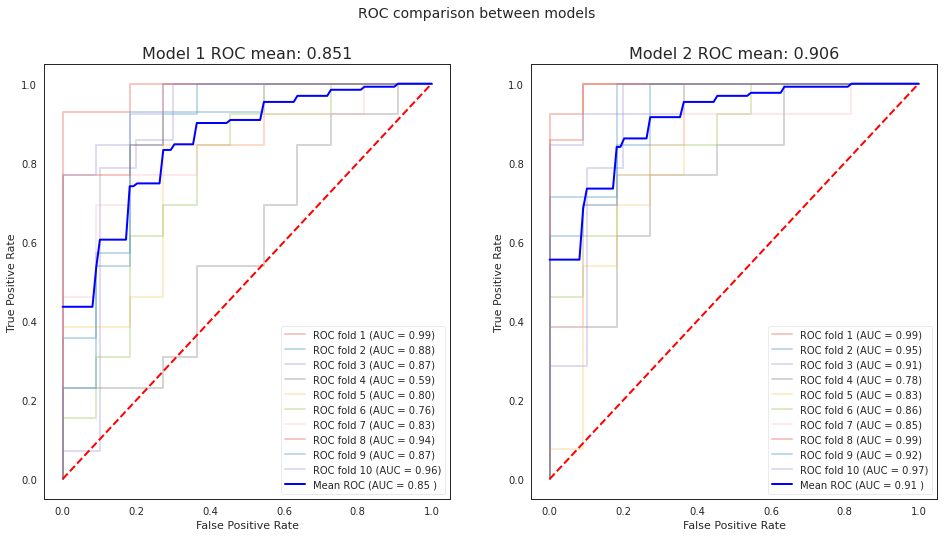

In [101]:
y_train = y_train.reset_index().iloc[:,1]
xx_train = X_train.values

xgb1 = XGBClassifier(random_state = 1)

xgb2 = XGBClassifier(learning_rate = 0.125,
                     n_estimators = 55, 
                     max_depth = 3,
                     min_child_weight = 5,
                     gamma = 0.1,
                     colsample_bytree = 0.6,
                     subsample = 0.7,
                     reg_alpha = 0.1,
                     reg_lambda = 0.075, 
                     random_state = 1)

def compare_ROC(model1, model2, x, y, folds = 8):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
    fig.suptitle('ROC comparison between models', size = 14)
    
    # CV strategy
    cv = StratifiedKFold(n_splits = 10, shuffle = False)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    
    for xtrain, xtest in cv.split(x, y_train):
        prediction = model1.fit(x[xtrain], y[xtrain]).predict_proba(x[xtest])
        fpr, tpr, t = roc_curve(y[xtest], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax1.plot(fpr, tpr, lw = 2, alpha = 0.3, label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i = i+1

    ax1.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
    mean_tpr = np.mean(tprs, axis = 0)
    mean_auc = auc(mean_fpr, mean_tpr)
    ax1.plot(mean_fpr, mean_tpr, color = 'blue',
             label = r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw = 2, alpha = 1)

    ax1.set_xlabel('False Positive Rate', size = 11)
    ax1.set_ylabel('True Positive Rate', size = 11)
    tit1 = 'Model 1 ROC mean: {}'.format(round(mean_auc, 3))
    ax1.set_title(tit1, size = 16)
    ax1.legend(loc = "lower right")
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    i = 1
    
    for xtrain, xtest in cv.split(x, y_train):
        prediction = model2.fit(x[xtrain], y[xtrain]).predict_proba(x[xtest])
        fpr, tpr, t = roc_curve(y[xtest], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax2.plot(fpr, tpr, lw = 2, alpha = 0.3, label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i = i+1

    ax2.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'red')
    mean_tpr = np.mean(tprs, axis = 0)
    mean_auc = auc(mean_fpr, mean_tpr)
    ax2.plot(mean_fpr, mean_tpr, color = 'blue',
             label = r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw = 2, alpha = 1)

    ax2.set_xlabel('False Positive Rate', size = 11)
    ax2.set_ylabel('True Positive Rate', size = 11)
    tit2 = 'Model 2 ROC mean: {}'.format(round(mean_auc, 3))
    ax2.set_title(tit2, size = 16)
    ax2.legend(loc = "lower right")

compare_ROC(xgb1, xgb2, xx_train, y_train)

We managed to increase the accuracy of the XGBoost significantly from 0.85 up to 0.9, being AUC = 0.78 the worst iteration. It also seems clear that the tuned model is more stable than the default one.

Now we will repeat this procedure with the rest of the models. In light of the example, we will just show the final tuned model without including all the steps and the initial normalized Gini score compared to the final Gini score with the parameters tuned in order to show how we managed to improve the accuracy of each model thanks to the Grid Search procedure.

In [102]:
# Initial Gini 0.73. Tuned model Gini = 0.82
rf = ensemble.RandomForestClassifier(random_state = 1)

params = {"n_estimators": [15], 
          "max_depth": [4],
          'bootstrap': [True],
          'max_features': ['auto'],
          'min_samples_leaf': [7],
          'min_samples_split': [2]
          }

grid_search = GridSearchCV(
    estimator = rf,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Best estimator:
RandomForestClassifier(max_depth=4, min_samples_leaf=7, n_estimators=15,
                       random_state=1)

 Best normalized gini score for 5-fold search:
0.82614536199095

 Best hyperparameters:
{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 15}


[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.2s finished


Random Forest
* Initial Gini score = 0.79
* Tuned model Gini score = 0.826 

In [103]:
# initial Gini = 0.803. Tuned model Gini = 0.83
exttrees = ensemble.ExtraTreesClassifier(random_state = 1) 

params = {"n_estimators": [45], 
          "max_depth": [3],
          'min_samples_split': [2],
          'min_samples_leaf' : [1],
          'min_weight_fraction_leaf': [0.2]
          }

grid_search = GridSearchCV(
    estimator = exttrees,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits

 Best estimator:
ExtraTreesClassifier(max_depth=3, min_weight_fraction_leaf=0.2, n_estimators=45,
                     random_state=1)

 Best normalized gini score for 5-fold search:
0.8272134574983838

 Best hyperparameters:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.2, 'n_estimators': 45}


[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.3s finished


Extra Trees Classifier:
* Initial Gini score = 0.803
* Tuned model Gini score = 0.83

In [104]:
# initial Gini = 0.819, final Gini = 0.824
lr = linear_model.LogisticRegression(random_state = 1) 

params = {"penalty": ['l1', 'l2', 'elasticnet', None], 
          "C": np.arange(-3, 3, 0.1)
          }

grid_search = GridSearchCV(
    estimator = lr,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 240 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.9s



 Best estimator:
LogisticRegression(C=2.9000000000000057, random_state=1)

 Best normalized gini score for 5-fold search:
0.824438429217841

 Best hyperparameters:
{'C': 2.9000000000000057, 'penalty': 'l2'}


[Parallel(n_jobs=4)]: Done 1913 out of 1920 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:    4.3s finished


Logistic Regression:
* Initial Gini score = 0.818
* Tuned model Gini score = 0.824  

In [105]:
# From Gini = 0.81 to Gini = 0.846
lr = linear_model.RidgeClassifier(random_state = 1) 

params = {'alpha': np.arange(10, 50, 1)}

grid_search = GridSearchCV(
    estimator = lr,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 40 candidates, totalling 320 fits


[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.3s



 Best estimator:
RidgeClassifier(alpha=14, random_state=1)

 Best normalized gini score for 5-fold search:
0.8265998707175177

 Best hyperparameters:
{'alpha': 14}


[Parallel(n_jobs=4)]: Done 320 out of 320 | elapsed:    1.8s finished


## Ridge:
* Initial Gini score = 0.82
* Tuned model Gini score = 0.826  

In [106]:
# Initial Gini 0.77 to 0.85
lgbm = lightgbm.LGBMClassifier(random_state = 1) 

params = {
    'learning_rate': [0.1],
    'n_estimators': [110],
    'max_depth': [2],
    'num_leaves': [3],
    'max_bin' :  [2],
    'min_child_samples': [2], 
    'min_child_weight': [0.9],
    'min_sum_hessian_in_leaf' : [0.1],
    'feature_fraction' : [0.7],
    'bagging_fraction' : [0.4],
    'bagging_freq' : [4],
    'min_split_gain': [0],
    'colsample_bytree': [0.5],
    'subsample': [0.5],
    'subsample_freq': [1],
    'reg_alpha': [0],
    'reg_lambda': [0.4]
    }

grid_search = GridSearchCV(
    estimator = lgbm,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits

 Best estimator:
LGBMClassifier(bagging_fraction=0.4, bagging_freq=4, colsample_bytree=0.5,
               feature_fraction=0.7, max_bin=2, max_depth=2,
               min_child_samples=2, min_child_weight=0.9, min_split_gain=0,
               min_sum_hessian_in_leaf=0.1, n_estimators=110, num_leaves=3,
               random_state=1, reg_alpha=0, reg_lambda=0.4, subsample=0.5,
               subsample_freq=1)

 Best normalized gini score for 5-fold search:
0.8327054379444085

 Best hyperparameters:
{'bagging_fraction': 0.4, 'bagging_freq': 4, 'colsample_bytree': 0.5, 'feature_fraction': 0.7, 'learning_rate': 0.1, 'max_bin': 2, 'max_depth': 2, 'min_child_samples': 2, 'min_child_weight': 0.9, 'min_split_gain': 0, 'min_sum_hessian_in_leaf': 0.1, 'n_estimators': 110, 'num_leaves': 3, 'reg_alpha': 0, 'reg_lambda': 0.4, 'subsample': 0.5, 'subsample_freq': 1}


[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.2s finished


LightGBM:
* Initial Gini score = 0.77
* Tuned model Gini score = 0.837  

In [107]:
# Initial Gini 0.77 to 0.83
lr = neighbors.KNeighborsClassifier() 

params = {
    'n_neighbors': [11],
    'weights': ['distance'],
    'algorithm': ['auto'],
    'leaf_size': [1],
    'p' : [1]
    }

grid_search = GridSearchCV(
    estimator = lr,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

Fitting 8 folds for each of 1 candidates, totalling 8 fits

 Best estimator:
KNeighborsClassifier(leaf_size=1, n_neighbors=11, p=1, weights='distance')

 Best normalized gini score for 5-fold search:
0.8275619141887525

 Best hyperparameters:
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished


KNN:
* Initial Gini score = 0.73
* Tuned model Gini score = 0.83  

In [108]:
# initial Gini = 0.78 to 0.826
from sklearn import svm
svm = svm.SVC(random_state = 1)

params = {
    'kernel': ['linear'],
    'C': [0.5],
    'degree': [0.1],
    'gamma': ['scale']
    }

grid_search = GridSearchCV(
    estimator = svm,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 8 folds for each of 1 candidates, totalling 8 fits


[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished



 Best estimator:
SVC(C=0.5, degree=0.1, kernel='linear', random_state=1)

 Best normalized gini score for 5-fold search:
0.824216224951519

 Best hyperparameters:
{'C': 0.5, 'degree': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


SVM:
* Initial Gini score = 0.821
* Tuned model Gini score = 0.845  

In [109]:
# initial Gini = 0.78 to 0.806
from sklearn.svm import NuSVC
nusvm = NuSVC(random_state = 1)

params = {
    'kernel': ['sigmoid'],
    'nu': [0.5],
    'degree': [1],
    'gamma': ['scale'],
    }

grid_search = GridSearchCV(
    estimator = nusvm,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

Fitting 8 folds for each of 1 candidates, totalling 8 fits

 Best estimator:
NuSVC(degree=1, kernel='sigmoid', random_state=1)

 Best normalized gini score for 5-fold search:
0.8086669764059469

 Best hyperparameters:
{'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid', 'nu': 0.5}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished


NuSVC:
* Initial Gini score = 0.78
* Tuned model Gini score = 0.806  

In [110]:
from sklearn.svm import LinearSVC
# initial Gini = 0.81 to 0.823
lda = LinearSVC(random_state = 1)

params = {
    'penalty' : ['l2'],
    'loss': ['hinge'],
    'tol': [2.12],
    'C': [2.8],
    'multi_class': ['ovr']
    }

grid_search = GridSearchCV(
    estimator = lda,
    param_grid = params,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 8,
    verbose = True
)
grid_search.fit(X_train, y_train)

print('\n Best estimator:')
print(grid_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search:' % (5))
print(grid_search.best_score_ * 2 - 1)  
print('\n Best hyperparameters:')
print(grid_search.best_params_)

Fitting 8 folds for each of 1 candidates, totalling 8 fits

 Best estimator:
LinearSVC(C=2.8, loss='hinge', random_state=1, tol=2.12)

 Best normalized gini score for 5-fold search:
0.8343669198448609

 Best hyperparameters:
{'C': 2.8, 'loss': 'hinge', 'multi_class': 'ovr', 'penalty': 'l2', 'tol': 2.12}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.1s finished


Logistic Regression:
* Initial Gini score = 0.818
* Tuned model Gini score = 0.823 

We're done with the optimization of the chosen algorithms. Now we are gonna take an overall look to all the models to see the overall performance. 

>lgbm 0.838 (0.070)
>LR 0.844 (0.077)
>Ridge 0.811 (0.073)
>ExtT 0.850 (0.070)
>RF 0.836 (0.077)
>XGB 0.836 (0.068)
>KNN 0.847 (0.072)
>SVC 0.848 (0.071)
>NuSVC 0.835 (0.069)
>LinearSVC 0.820 (0.087)
>LDA 0.839 (0.064)


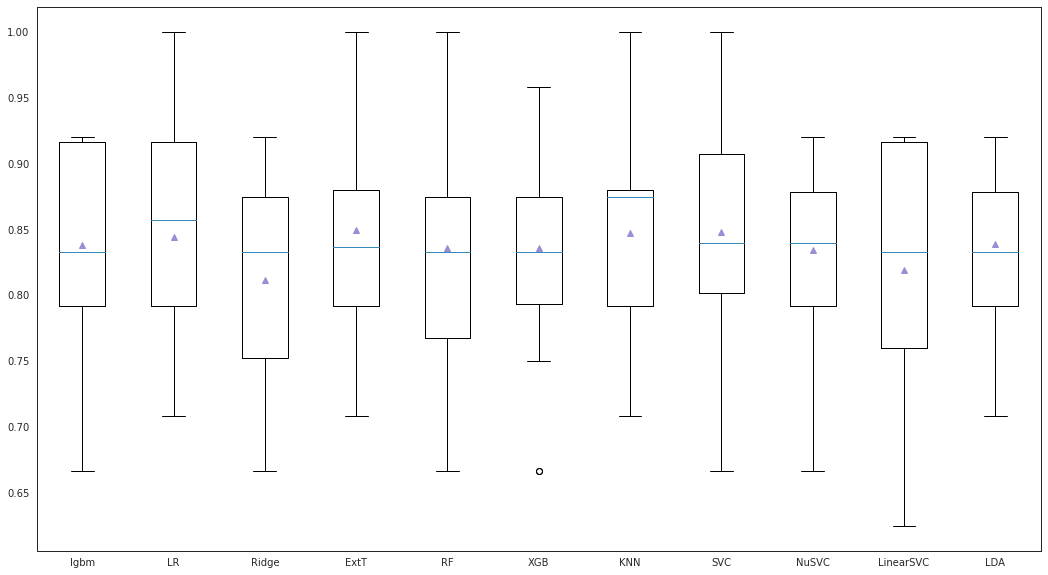

In [111]:
from sklearn.svm import SVC 
from sklearn import ensemble
def get_models():
    models = dict()
    
    models['lgbm'] = lightgbm.LGBMClassifier(objective = 'binary',
                             metrics = 'auc',
                             learning_rate = 0.1,
                             max_depth = 2,
                             max_bin = 2,
                             n_estimators = 280,
                             num_leaves = 3,
                             min_child_samples = 2, 
                             min_child_weight = 0.9,
                             min_sum_hessian_in_leaf= 0.1,
                             feature_fraction = 0.7,
                             bagging_fraction = 0.4,
                             bagging_freq = 4,
                             random_state = 1,
                             subsample = 0.5,
                             colsample_bytree = 0.5,
                             subsample_freq = 1,
                             reg_alpha = 0,                      
                             reg_lambda = 0.4)
       
    models['LR'] = linear_model.LogisticRegression(
                            random_state = 1,
                            C = 1.82, 
                            penalty = 'l2') 
    
    models['Ridge'] = linear_model.RidgeClassifier(
                            random_state = 1,
                            alpha = 350) 
    
    models['ExtT'] = ensemble.ExtraTreesClassifier(
                            random_state = 1,
                            n_estimators = 45, 
                            max_depth = 3,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            min_weight_fraction_leaf = 0.2)
    
    models['RF'] = ensemble.RandomForestClassifier(
                            random_state = 1,
                            n_estimators = 45,
                            max_depth = 4) 
    
    models['XGB'] = XGBClassifier(learning_rate = 0.15,
                            n_estimators = 25, 
                            max_depth = 3,
                            min_child_weight = 5,
                            gamma = 0.1,
                            colsample_bytree = 0.6,
                            subsample = 0.7,
                            reg_alpha = 0.1,
                            reg_lambda = 0.075, 
                            random_state = 1)
    
    models['KNN'] = neighbors.KNeighborsClassifier(
                            #random_state = 1,
                            n_neighbors = 11,
                            weights = 'distance',
                            algorithm = 'auto',
                            leaf_size = 1,
                            p = 1) 

    models['SVC'] = SVC(
                            random_state = 1, 
                            kernel = 'linear',
                            C = 0.2,
                            degree = 0,
                            gamma = 'scale')

    models['NuSVC'] = NuSVC(
                           random_state = 1,
                           kernel = 'sigmoid',
                           nu = 0.5,
                           degree = 1,
                           gamma = 'scale')

    models['LinearSVC'] = LinearSVC(
                           penalty = 'l2',
                           loss = 'hinge',
                           tol = 2.12,
                           C = 2.8,
                           multi_class = 'ovr',
                           random_state = 1)
    
    models['LDA'] = discriminant_analysis.LinearDiscriminantAnalysis(
                           solver = 'svd',
                           n_components = 1,
                           tol = 0.9,
                           store_covariance = True)

    return models
 
models = get_models()
# evaluate the models and store results
results, names = list(), list()


# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = 4, error_score = 'raise')
    return scores

for name,model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels = names, showmeans = True)
plt.show()

Not all the models show the same performance, but on the whole there're no major differences between them though. We will try to create now an ensemble model just with Logistic Regression, Extra Trees, Random Forest, KNN, and SVC. The only reason we prefer this option rather to crunch all the models into one ensemble is to keep the ensemble model as simple as possible and improve the total running time of the script. Often times a simple approach is better than a convoluted ensemble. 

# Sample clean up algorithm

Before creating the ensemble, we need to create a function to adapt the entries to the new format of the train split. We have dummified the categorical variables and standardized the numerical variables, so the new data introduced to be predicted needs to be converted into the same shape.

We will use the following array as example. This sample belongs to the train dataset, and the values are introduced in the same column order as the train split dataframe. 

In [112]:
sample_1 = [[52, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3]]

This is how a function to match this new sample to the shape of the training data would look.

In [113]:
def clean_up(sample):

    # Integer features
    num_idx = [0, 3, 4, 7, 9]
    temp = []
    for i in num_idx:
        temp = np.append(temp, sample[0][i])
    temp = np.reshape(temp, (-1, 5))
    temp = pwr.transform(temp)
    
    # Categorical features
    num_idx = [1, 2, 5, 6, 8, 10, 11, 12]
    tempb = []
    for i in num_idx:
        tempb = np.append(tempb, sample[0][i])
    arr = []
    for i in range(0, len(tempb)):
        if i == 0:   # sex
            if tempb[0] == 0:
                arr = np.append(arr, [1, 0], axis = 0)
            else:
                arr = np.append(arr, [0, 1], axis = 0)
        if i == 1:  #cp
            if tempb[1] == 1:
                arr = np.append(arr, [1, 0, 0, 0], axis = 0)
            elif tempb[1] == 2:
                arr = np.append(arr, [0, 1, 0, 0], axis = 0)
            elif tempb[1] == 3:
                arr = np.append(arr, [0, 1, 0, 0], axis = 0)
            else:
                arr = np.append(arr, [0, 0, 0, 1], axis = 0)
        if i == 2:  # fbs
            if tempb[2] == 0:
                arr = np.append(arr, [1, 0], axis = 0)
            else:
                arr = np.append(arr, [0, 1], axis = 0)
        if i == 3: # restecg
            if tempb[3] == 0:
                arr = np.append(arr, [1, 0, 0], axis = 0)
            elif tempb[3] == 1:
                arr = np.append(arr, [0, 1, 0], axis = 0)
            else:
                arr = np.append(arr, [0, 0, 1], axis = 0)
        if i == 4: # exang
            if tempb[4] == 0:
                arr = np.append(arr, [1, 0], axis = 0)
            else:
                arr = np.append(arr, [0, 1], axis = 0)
        if i == 5: # slope
            if tempb[5] == 0:
                arr = np.append(arr, [1, 0, 0], axis = 0)
            elif tempb[5] == 1:
                arr = np.append(arr, [0, 1, 0], axis = 0)
            else:
                arr = np.append(arr, [0, 0, 1], axis = 0)
        if i == 6: # ca
            if tempb[6] == 0:
                arr = np.append(arr, [1, 0, 0, 0, 0], axis = 0)
            elif tempb[6] == 1:
                arr = np.append(arr, [0, 1, 0, 0, 0], axis = 0)
            elif tempb[6] == 2:
                arr = np.append(arr, [0, 0, 1, 0, 0], axis = 0)
            elif tempb[6] == 3:
                arr = np.append(arr, [0, 0, 0, 1, 0], axis = 0)
            else:
                arr = np.append(arr, [0, 0, 0, 0, 1], axis = 0)
        if i == 7: # thal
            if tempb[7] == 0:
                arr = np.append(arr, [1, 0, 0, 0], axis = 0)
            elif tempb[7] == 1:
                arr = np.append(arr, [0, 1, 0, 0], axis = 0)
            elif tempb[7] == 2:
                arr = np.append(arr, [0, 0, 1, 0], axis = 0)
            else:
                arr = np.append(arr, [0, 0, 0, 1], axis = 0)     
        
    res = np.append(temp.ravel(), arr, axis = 0)
    
    return np.reshape(res, (-1, 30))


In [114]:
sample_clean = clean_up(sample_1)
sample_clean

array([[-0.27694842,  2.00082882, -0.93906238,  0.44243055, -0.20642868,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

As you can see, now the array has 30 like the train split after being dummified and the first numerical values are transformed using the same parameters of the original Yeo-Johnson transformation.

# Simple Averaging Ensemble


In this section we will be finally creating the ensemble of models to make the final predictions. The first approach is gonna be a simple average of the previous models. 

First up, we write the models with the best parameter configuration, make the predictions with the previous sample and finally we just need to calculate the average of the predictions of each model.

In [115]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

LR = linear_model.LogisticRegression(
        random_state = 1,
        C = 1.82, 
        penalty = 'l2')

ExtT = ExtraTreesClassifier(
        random_state = 1,
        n_estimators = 45, 
        max_depth = 3,
        min_samples_split = 2,
        min_samples_leaf = 1,
        min_weight_fraction_leaf = 0.2)

RF = RandomForestClassifier(
        random_state = 1,
        n_estimators = 45,
        max_depth = 4)

KNN = neighbors.KNeighborsClassifier(
        n_neighbors = 11,
        weights = 'distance',
        algorithm = 'auto',
        leaf_size = 1,
        p = 1)

SVC = SVC(
        random_state = 1, 
        kernel = 'linear',
        C = 0.2,
        degree = 0,
        gamma = 'scale')


LR.fit(X_train, y_train)
ExtT.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
SVC.fit(X_train, y_train)

SVC(C=0.2, degree=0, kernel='linear', random_state=1)

Now the models are trained, let's find out how they perform on the sample.

In [116]:
LR_pred = LR.predict(sample_clean)
ExtT_pred = ExtT.predict(sample_clean)
RF_pred = RF.predict(sample_clean)
KNN_pred = KNN.predict(sample_clean)
SVC_pred = SVC.predict(sample_clean)

avg_pred = (LR_pred + ExtT_pred + RF_pred + KNN_pred + SVC_pred)//5
avg_pred

array([1])

All 5 models classified this sample as a positive in heart attack risk.

Knowing that this sample actually belongs to a heart attack risk positive, let's calculate the accuracy score for this ensemble.

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score([1], avg_pred)

1.0

100% accuracy, that means that all the ML models classified this sample correctly. 

# Stacked Ensemble Model 

A bit more complex approach is to crunch all the models in an ensemble and declare a different weight to each model according to its performance. In order to achieve this, we need to use the Voting Classifier from SKLearn. 

In [118]:
final_model = list()
final_model.append(('LR', LR))  
final_model.append(('ExtTreeS', ExtT))    
final_model.append(('RF', RF))
final_model.append(('KNN', KNN))
final_model.append(('SVC', SVC))


ensemble = VotingClassifier(estimators = final_model, voting = 'hard')
ensemble.fit(X_train, y_train)
ensemble

VotingClassifier(estimators=[('LR', LogisticRegression(C=1.82, random_state=1)),
                             ('ExtTreeS',
                              ExtraTreesClassifier(max_depth=3,
                                                   min_weight_fraction_leaf=0.2,
                                                   n_estimators=45,
                                                   random_state=1)),
                             ('RF',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=45,
                                                     random_state=1)),
                             ('KNN',
                              KNeighborsClassifier(leaf_size=1, n_neighbors=11,
                                                   p=1, weights='distance')),
                             ('SVC',
                              SVC(C=0.2, degree=0, kernel='linear',
                                  random_state=1))])

We are gonna put more weight on the ExtraTrees algorithm as it looks to be the most accurate of all models, and a bit more importance to KNN and SVC.

All the models are tuned and cross validated, so with this we are going to create a hard voting Classifier. The main difference between this type of classifier and a soft voting classifier is that we are gonna obtain just one prediction, which would be the most likely classification.

>LR 0.844 (0.077)
>ExtT 0.850 (0.070)
>RF 0.836 (0.077)
>KNN 0.847 (0.072)
>SVC 0.848 (0.071)
>Ensemble 0.853 (0.071)


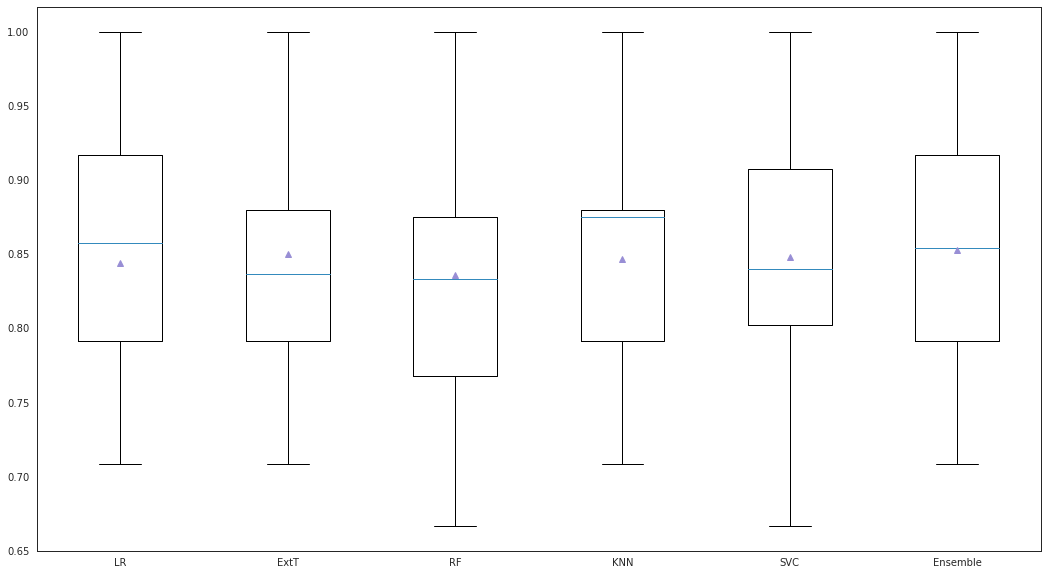

In [123]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

weight = [1, 5, 1, 2, 2]

def get_voting():
    models = list()
    models.append(('LR', LR))
    models.append(('ExtT', ExtT))
    models.append(('RF', RF))
    models.append(('KNN', KNN))
    models.append(('SVC', SVC))
    ensemble = VotingClassifier(estimators = models, voting = 'hard', weights = weight)
    return ensemble

def get_models():
    models = dict()
    models['LR'] = LogisticRegression(
                            random_state = 1,
                            C = 1.82, 
                            penalty = 'l2') 
    
    models['ExtT'] = ExtraTreesClassifier(
                            random_state = 1,
                            n_estimators = 45, 
                            max_depth = 3,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            min_weight_fraction_leaf = 0.2)

    models['RF'] = RandomForestClassifier(
                            random_state = 1,
                            n_estimators = 45,
                            max_depth = 4)
    
    models['KNN'] = KNeighborsClassifier(
                            n_neighbors = 11,
                            weights = 'distance',
                            algorithm = 'auto',
                            leaf_size = 1,
                            p = 1)
    
    models['SVC'] = SVC(
                            random_state = 1, 
                            kernel = 'linear',
                            C = 0.2,
                            degree = 0,
                            gamma = 'scale')

    models['Ensemble'] = ensemble
    return models

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels = names, showmeans = True)
pyplot.show()

The ensemble improved the overall performance of the models up to a Gini = 0.853, with a standard deviation of 0.071. Finally, let's introduce the previous sample to see how is classified. 

In [124]:
ensemble.predict(sample_clean)

array([1])